In [58]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt


data = pd.read_csv('FremontBridge.csv', index_col = 'Date', parse_dates= True)

In [59]:
data.head()

,Fremont Bridge West Sidewalk,Fremont Bridge East Sidewalk
Date,,
2012-10-03 00:00:00,4.0,9.0
2012-10-03 01:00:00,4.0,6.0
2012-10-03 02:00:00,1.0,1.0
2012-10-03 03:00:00,2.0,3.0
2012-10-03 04:00:00,6.0,1.0


In [60]:
data.columns

Index(['Fremont Bridge West Sidewalk', 'Fremont Bridge East Sidewalk'], dtype='object')

In [61]:
data.columns = ['West', 'East']

In [62]:
data['Total'] = data['West'] + data['East']

In [63]:
data

,West,East,Total
Date,,,
2012-10-03 00:00:00,4.0,9.0,13.0
2012-10-03 01:00:00,4.0,6.0,10.0
2012-10-03 02:00:00,1.0,1.0,2.0
2012-10-03 03:00:00,2.0,3.0,5.0
2012-10-03 04:00:00,6.0,1.0,7.0
...,...,...,...
2015-09-30 19:00:00,216.0,84.0,300.0
2015-09-30 20:00:00,102.0,42.0,144.0
2015-09-30 21:00:00,85.0,34.0,119.0


In [64]:
data.dropna().describe()

,West,East,Total
count,26225.000000,26225.000000,26225.000000
mean,58.310658,53.605682,111.916339
std,75.671427,76.128342,137.383976
min,0.000000,0.000000,0.000000
25%,7.000000,7.000000,17.000000
50%,33.000000,28.000000,64.000000
75%,77.000000,67.000000,149.000000
max,781.000000,667.000000,1050.000000


In [65]:
data.mean()

West      58.310658
East      53.605682
Total    111.916339
dtype: float64

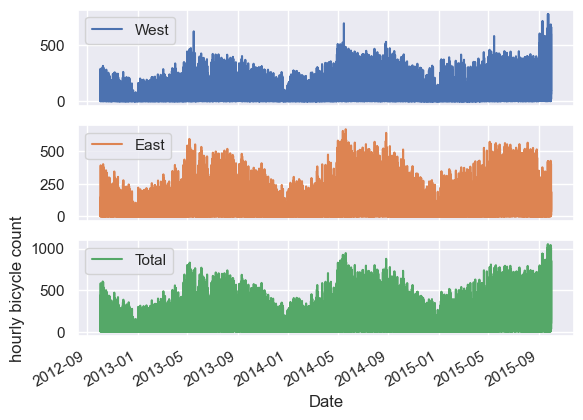

In [66]:
sns.set()
data.plot(subplots = True)
plt.ylabel('hourly bicycle count')
plt.gcf().autofmt_xdate()

plt.show()

In [67]:
data

,West,East,Total
Date,,,
2012-10-03 00:00:00,4.0,9.0,13.0
2012-10-03 01:00:00,4.0,6.0,10.0
2012-10-03 02:00:00,1.0,1.0,2.0
2012-10-03 03:00:00,2.0,3.0,5.0
2012-10-03 04:00:00,6.0,1.0,7.0
...,...,...,...
2015-09-30 19:00:00,216.0,84.0,300.0
2015-09-30 20:00:00,102.0,42.0,144.0
2015-09-30 21:00:00,85.0,34.0,119.0


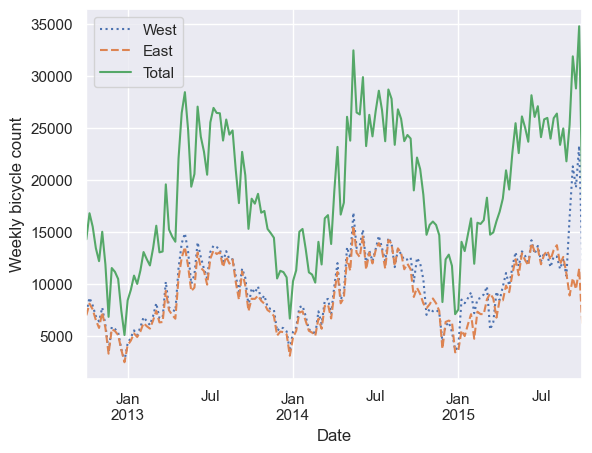

In [68]:
weekly = data.resample("W").sum()
weekly.plot(style=[':', '--', '-'])
plt.ylabel('Weekly bicycle count')
plt.show()

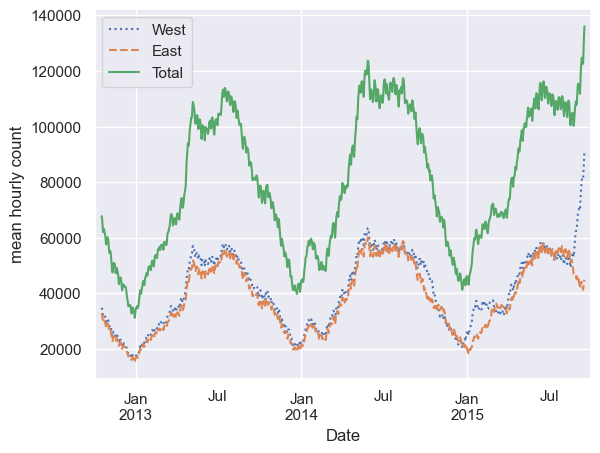

In [69]:
daily = data.resample('D').sum()
daily.rolling(30, center=True).sum().plot(style=[':', '--', '-'])
plt.ylabel('mean hourly count')
plt.show()

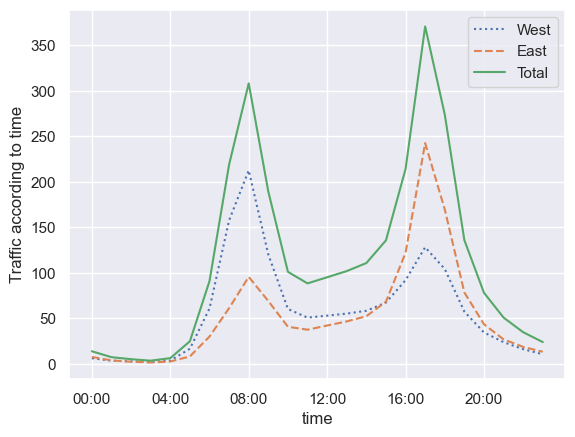

In [72]:
import numpy as np
by_time = data.groupby(data.index.time).mean()
hourly_ticks = 4 * 60 * 60 * np.arange(6)
by_time.plot(xticks= hourly_ticks, style=[':', '--', '-'])
plt.ylabel("Traffic according to time")
plt.show()